<a href="https://colab.research.google.com/github/Kusumash28/AIML-lab/blob/main/PolynomialRegressionnew.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df = pd.read_csv('/content/testdata.csv')
df.head()

,Sl. No,Temperature,Preasure
0,1,2,0.0002
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900


In [3]:
temperature = df.iloc[:, 1:2].values #Input
preasure = df.iloc[:, 2].values #output

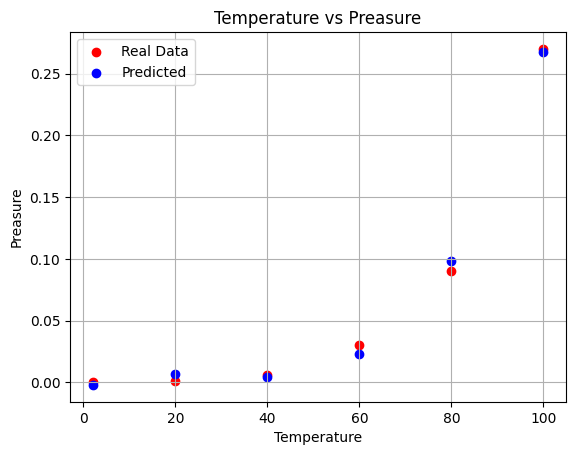

In [5]:
polyreg = PolynomialFeatures(degree=3)
X_poly = polyreg.fit_transform(temperature) #Transforming the input data into polynomial features
linreg = LinearRegression()
linreg.fit(X_poly, preasure) #Fitting the model with the transformed data
#Predicting the output with the transformed input data
predicted_preasure = linreg.predict(X_poly)

#Visualising the results
plt.scatter(temperature, preasure, color='red')
plt.scatter(temperature, predicted_preasure, color='blue')
plt.title('Temperature vs Preasure')
plt.xlabel('Temperature')
plt.ylabel('Preasure')
plt.legend(['Real Data', 'Predicted'])
plt.grid()
plt.show()

Activity to do:
1. Run the code by changing the value of degree variable and observe the plot and write the observation
2. Implement on Auto MPG Dataset

<ipython-input-7-f73ccac17bf9>:13: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(url, names=column_names, delim_whitespace=True, na_values='?')


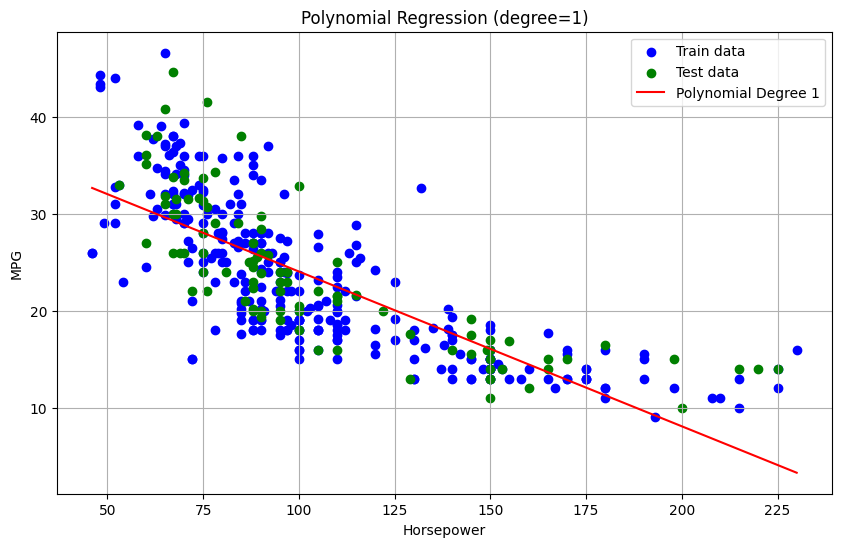

Mean Squared Error (degree=1): 22.50


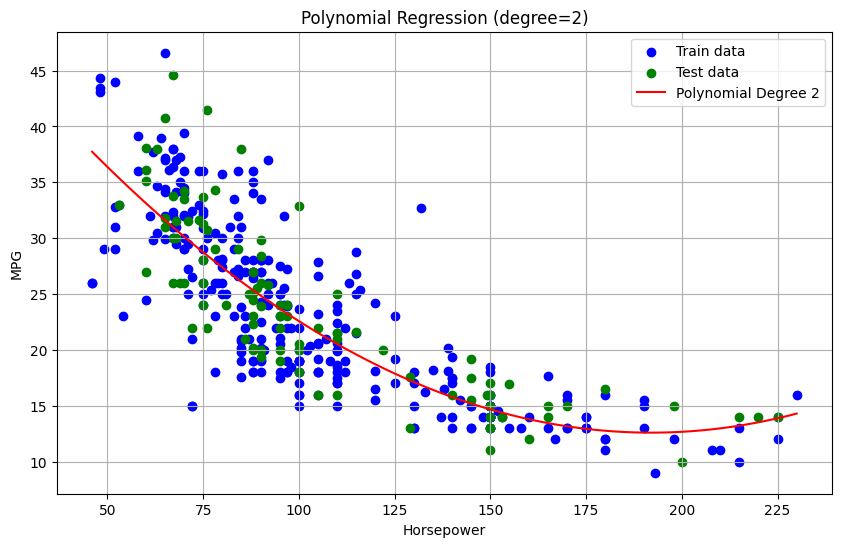

Mean Squared Error (degree=2): 16.23


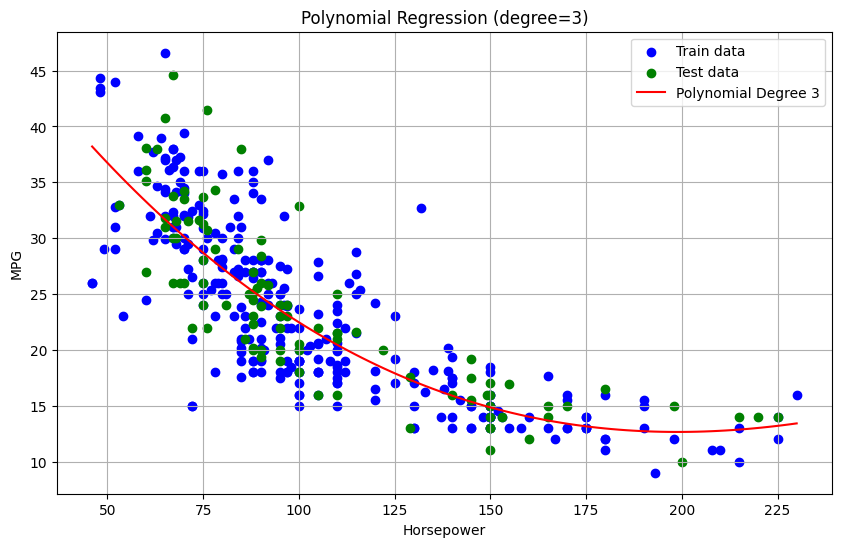

Mean Squared Error (degree=3): 16.17


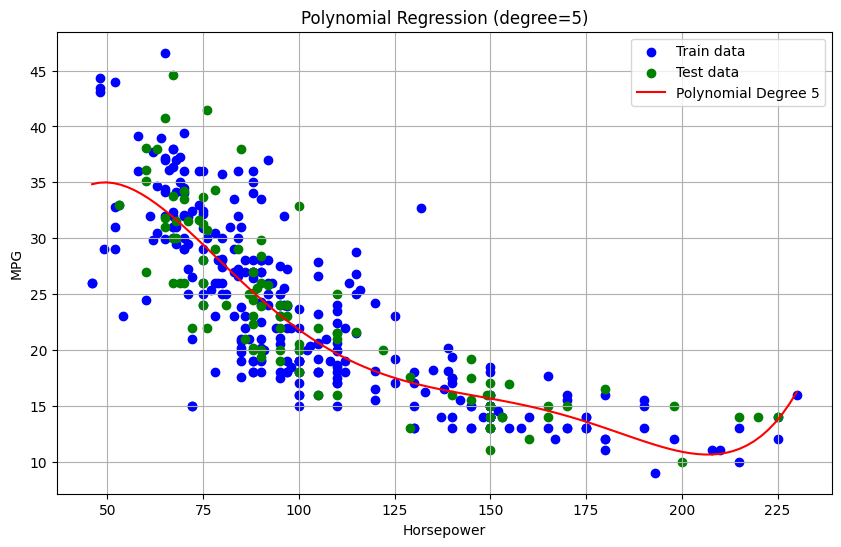

Mean Squared Error (degree=5): 15.94


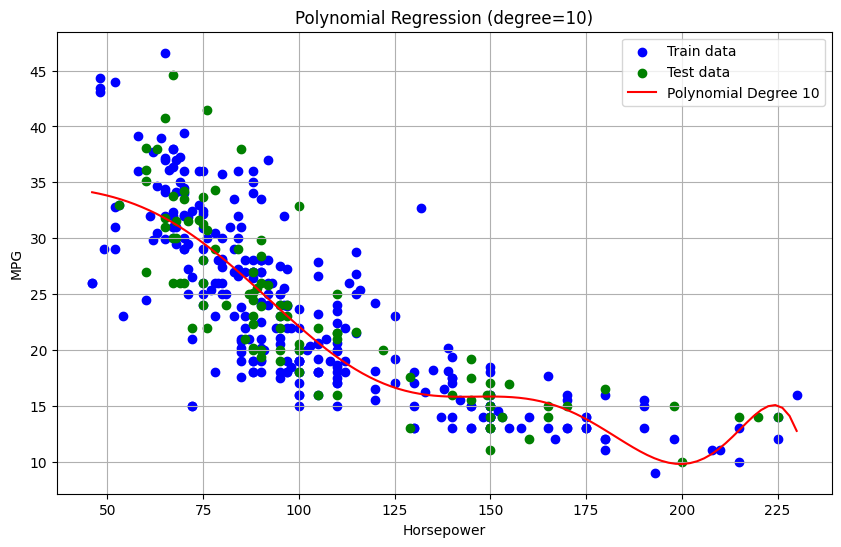

Mean Squared Error (degree=10): 16.58


In [7]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Step 2: Load the Auto MPG dataset
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
column_names = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model_year','origin','car_name']
df = pd.read_csv(url, names=column_names, delim_whitespace=True, na_values='?')

# Drop rows with missing values
df = df.dropna()

# Step 3: Select features and target
X = df[['horsepower']].values  # You can change this to another feature
y = df['mpg'].values

# Step 4: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Function to train and plot polynomial regression
def plot_polynomial_regression(degree):
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X_train)

    # Train the model
    model = LinearRegression()
    model.fit(X_poly, y_train)

    # Predict on train and test data
    X_test_poly = poly.transform(X_test)
    y_pred = model.predict(X_test_poly)

    # Plot results
    plt.figure(figsize=(10, 6))
    plt.scatter(X_train, y_train, color='blue', label='Train data')
    plt.scatter(X_test, y_test, color='green', label='Test data')

    # Sort for smooth curve
    X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    X_plot_poly = poly.transform(X_plot)
    y_plot = model.predict(X_plot_poly)

    plt.plot(X_plot, y_plot, color='red', label=f'Polynomial Degree {degree}')
    plt.xlabel('Horsepower')
    plt.ylabel('MPG')
    plt.title(f'Polynomial Regression (degree={degree})')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Print MSE
    mse = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error (degree={degree}): {mse:.2f}')

# Example: Try different degrees
for deg in [1, 2, 3, 5, 10]:
    plot_polynomial_regression(degree=deg)
